In [ ]:
!gdown "1j6ODbGHfOtyBY5KAh1GtsRypbyYWLQKY"

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from models.tree import DecisionTreeClassifier

from utils.preprocessing import preprocess_df

from utils.metrics import accuracy, precision, recall, confusion_matrix
from sklearn import tree

from sklearn.model_selection import train_test_split

from models.multiclass import OneVsAllClassifier, OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier as OVASklearn
from sklearn.multiclass import OneVsOneClassifier as OVOSklearn

## Heart Failure Clinical Records Dataset

In [ ]:
path = "data\heart_failure_clinical_records_dataset.csv"
title = path.split("\\")[-1].split(r".")[0].replace("_", " ").title()

df = pd.read_csv(path)
df = df.drop(columns=["time"])
df, dtype_dict = preprocess_df(df, title)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582.0,0,20.0,1,265000.00,1.9,130.0,1,0,1
1,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136.0,1,0,1
2,65.0,0,146.0,0,20.0,0,162000.00,1.3,129.0,1,1,1
3,50.0,1,111.0,0,20.0,0,210000.00,1.9,137.0,1,0,1
4,65.0,1,160.0,1,20.0,0,327000.00,2.7,116.0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    float64 
 1   anaemia                   299 non-null    category
 2   creatinine_phosphokinase  299 non-null    float64 
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    float64 
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    float64 
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  DEATH_EVENT               299 non-null    category
dtypes: category(6), float64(6)
memory usage: 16.6 KB


In [ ]:
df.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000


In [ ]:
corr = df.corr()

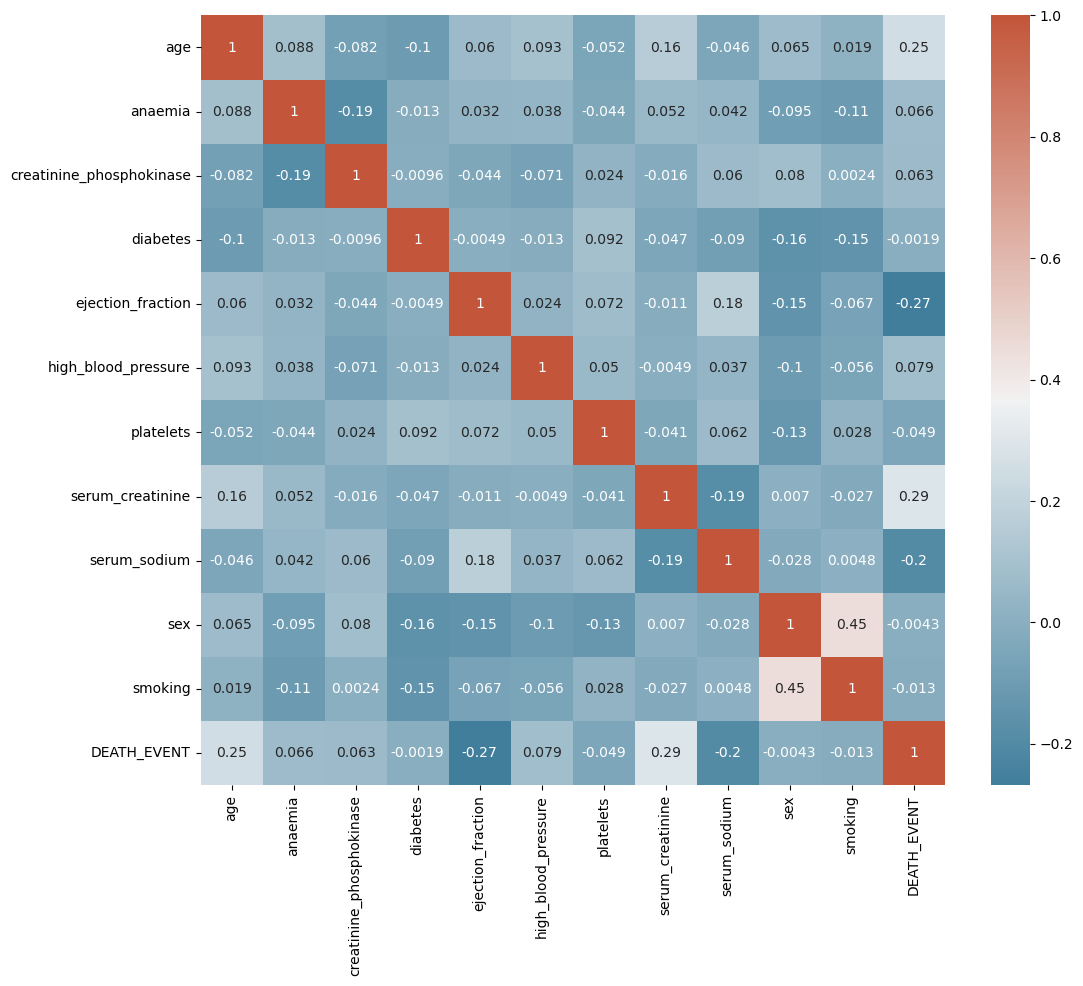

In [ ]:
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=cmap)
plt.show()

In [ ]:
X = df.drop(columns=[df.columns[-1]]).values
y = df[df.columns[-1]].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 1. C4.5

#### My Model

In [ ]:
model = DecisionTreeClassifier(method="c4.5")
model.fit(X_train, y_train, dtype_dict)


In [ ]:
model.print_tree()

Node: Feature 4 (Threshold = 22.500)
  Value <=:
    Node: Feature 7 (Threshold = 1.050)
      Value <=:
        Leaf: Predict = 0
      Value >:
        Leaf: Predict = 1
  Value >:
    Node: Feature 7 (Threshold = 1.815)
      Value <=:
        Node: Feature 0 (Threshold = 81.500)
          Value <=:
            Node: Feature 4 (Threshold = 32.500)
              Value <=:
                Node: Feature 7 (Threshold = 0.850)
                  Value <=:
                    Leaf: Predict = 0
                  Value >:
                    Node: Feature 2 (Threshold = 183.500)
                      Value <=:
                        Node: Feature 2 (Threshold = 92.000)
                          Value <=:
                            Leaf: Predict = 0
                          Value >:
                            Node: Feature 8 (Threshold = 143.000)
                              Value <=:
                                Node: Feature 6 (Threshold = 307500.000)
                               

In [ ]:
y_pred = model.predict(X_test)

_accuracy = accuracy(y_pred, y_test)
_precision = precision(y_pred, y_test)
_recall = recall(y_pred, y_test)

print(f"accuracy : {_accuracy}")
print(f"precision : {_precision}")
print(f"recall : {_recall}")

_confusion_matrix = confusion_matrix(y_pred, y_test)
print(_confusion_matrix)

accuracy : 0.7166666666666667
precision : 0.48
recall : 0.75
[[31 13]
 [ 4 12]]


#### Baseline Model

In [ ]:
base_line_model = tree.DecisionTreeClassifier(criterion="entropy",random_state=42)
base_line_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
text_representation = tree.export_text(base_line_model)
print(text_representation)

|--- feature_7 <= 1.81
|   |--- feature_4 <= 32.50
|   |   |--- feature_7 <= 0.85
|   |   |   |--- class: 0
|   |   |--- feature_7 >  0.85
|   |   |   |--- feature_2 <= 183.50
|   |   |   |   |--- feature_2 <= 63.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  63.50
|   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |--- feature_0 <= 62.50
|   |   |   |   |   |   |   |--- feature_0 <= 55.00
|   |   |   |   |   |   |   |   |--- feature_6 <= 422500.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_6 >  422500.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  55.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  62.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  183.50
|   |   |   |   |--- feature_8 <= 140.50


In [ ]:
y_pred_base_line = base_line_model.predict(X_test)

_accuracy_base_line = accuracy(y_pred_base_line, y_test)
_precision_base_line = precision(y_pred_base_line, y_test)
_recall_base_line = recall(y_pred_base_line, y_test)

print(f"accuracy : {_accuracy_base_line}")
print(f"precision : {_precision_base_line}")
print(f"recall : {_recall_base_line}")

_confusion_matrix_base_line = confusion_matrix(y_pred_base_line, y_test)
print(_confusion_matrix_base_line)

accuracy : 0.7
precision : 0.56
recall : 0.6666666666666666
[[28 11]
 [ 7 14]]


##### Comparison of My Model vs Baseline Model

In [ ]:
print(f"My Model(C4.5) : ")
print(f"accuracy : {_accuracy}")
print(f"precision : {_precision}")
print(f"recall : {_recall}")

_confusion_matrix = confusion_matrix(y_pred, y_test)
print(_confusion_matrix)

print()

print(f"Baseline Model : ")
print(f"accuracy : {_accuracy_base_line}")
print(f"precision : {_precision_base_line}")
print(f"recall : {_recall_base_line}")

_confusion_matrix_base_line = confusion_matrix(y_pred_base_line, y_test)
print(_confusion_matrix_base_line)

My Model(C4.5) : 
accuracy : 0.7166666666666667
precision : 0.48
recall : 0.75
[[31 13]
 [ 4 12]]

Baseline Model : 
accuracy : 0.7
precision : 0.56
recall : 0.6666666666666666
[[28 11]
 [ 7 14]]


#

### 2. CART

#### My Model

In [ ]:
model = DecisionTreeClassifier(max_depth=3,method="cart")
model.fit(X_train, y_train, dtype_dict)

In [ ]:
model.print_tree()

Node: Feature 7 (Threshold = 1.815)
  Value <=:
    Node: Feature 4 (Threshold = 32.500)
      Value <=:
        Node: Feature 7 (Threshold = 0.950)
          Value <=:
            Leaf: Predict = 0
          Value >:
            Leaf: Predict = 1
      Value >:
        Node: Feature 0 (Threshold = 79.500)
          Value <=:
            Leaf: Predict = 0
          Value >:
            Leaf: Predict = 1
  Value >:
    Node: Feature 7 (Threshold = 2.050)
      Value <=:
        Leaf: Predict = 1
      Value >:
        Node: Feature 4 (Threshold = 36.500)
          Value <=:
            Leaf: Predict = 0
          Value >:
            Leaf: Predict = 1


In [ ]:
y_pred = model.predict(X_test)

_accuracy = accuracy(y_pred, y_test)
_precision = precision(y_pred, y_test)
_recall = recall(y_pred, y_test)

print(f"accuracy : {_accuracy}")
print(f"precision : {_precision}")
print(f"recall : {_recall}")

_confusion_matrix = confusion_matrix(y_pred, y_test)
print(_confusion_matrix)

accuracy : 0.7333333333333333
precision : 0.56
recall : 0.7368421052631579
[[30 11]
 [ 5 14]]


#### Baseline Model

In [ ]:
base_line_model = tree.DecisionTreeClassifier(criterion="gini", random_state=42)
base_line_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
text_representation = tree.export_text(base_line_model)
print(text_representation)

|--- feature_7 <= 1.81
|   |--- feature_4 <= 32.50
|   |   |--- feature_7 <= 0.95
|   |   |   |--- feature_0 <= 61.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  61.50
|   |   |   |   |--- class: 1
|   |   |--- feature_7 >  0.95
|   |   |   |--- feature_2 <= 183.50
|   |   |   |   |--- feature_2 <= 63.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  63.50
|   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |--- feature_0 <= 62.50
|   |   |   |   |   |   |   |--- feature_7 <= 1.15
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_7 >  1.15
|   |   |   |   |   |   |   |   |--- feature_0 <= 56.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_0 >  56.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  62.50
|   |   |   |   |   |   

In [ ]:
y_pred_base_line = base_line_model.predict(X_test)

_accuracy_base_line = accuracy(y_pred_base_line, y_test)
_precision_base_line = precision(y_pred_base_line, y_test)
_recall_base_line = recall(y_pred_base_line, y_test)

print(f"accuracy : {_accuracy_base_line}")
print(f"precision : {_precision_base_line}")
print(f"recall : {_recall_base_line}")

_confusion_matrix_base_line = confusion_matrix(y_pred_base_line, y_test)
print(_confusion_matrix_base_line)

accuracy : 0.7166666666666667
precision : 0.52
recall : 0.7222222222222222
[[30 12]
 [ 5 13]]


##### Comparison of My Model vs Baseline Model

In [ ]:
print(f"My Model(CART) : ")
print(f"accuracy : {_accuracy}")
print(f"precision : {_precision}")
print(f"recall : {_recall}")

_confusion_matrix = confusion_matrix(y_pred, y_test)
print(_confusion_matrix)

print()

print(f"Baseline Model : ")
print(f"accuracy : {_accuracy_base_line}")
print(f"precision : {_precision_base_line}")
print(f"recall : {_recall_base_line}")

_confusion_matrix_base_line = confusion_matrix(y_pred_base_line, y_test)
print(_confusion_matrix_base_line)

My Model(CART) : 
accuracy : 0.7333333333333333
precision : 0.56
recall : 0.7368421052631579
[[30 11]
 [ 5 14]]

Baseline Model : 
accuracy : 0.7166666666666667
precision : 0.52
recall : 0.7222222222222222
[[30 12]
 [ 5 13]]


## Covid

In [ ]:
path = "data\Covid19.csv"
title = path.split("\\")[-1].split(r".")[0].replace("_", " ").title()

df = pd.read_csv(path)
df, dtype_dict = preprocess_df(df, title)
df.head()

,sex,age,country,province,city,infection_case,infection_order,elementary_school_count,kindergarten_count,university_count,...,elderly_alone_ratio,nursing_home_count,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity,label
0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,1,1,0,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1
2,0,2,0,0,2,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,2.0,1.0,0
3,0,1,0,0,3,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,3.0,1.0,0
4,1,3,0,0,4,3,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,14.0,4.0,1.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50729 entries, 0 to 50728
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   sex                       50729 non-null  category
 1   age                       50729 non-null  category
 2   country                   50729 non-null  category
 3   province                  50729 non-null  category
 4   city                      50729 non-null  category
 5   infection_case            50729 non-null  category
 6   infection_order           50729 non-null  category
 7   elementary_school_count   50729 non-null  category
 8   kindergarten_count        50729 non-null  category
 9   university_count          50729 non-null  category
 10  academy_ratio             50729 non-null  category
 11  elderly_population_ratio  50729 non-null  category
 12  elderly_alone_ratio       50729 non-null  category
 13  nursing_home_count        50729 non-null  cate

In [ ]:
df.describe()

,sex,age,country,province,city,infection_case,infection_order,elementary_school_count,kindergarten_count,university_count,...,elderly_alone_ratio,nursing_home_count,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity,label
count,50729,50729,50729,50729,50729,50729,50729.0,50729.0,50729.0,50729.0,...,50729.0,50729.0,50729.0,50729.0,50729.0,50729.0,50729.0,50729.0,50729.0,50729
unique,2,7,2,2,19,7,4.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,14.0,17.0,2.0,3
top,0,1,0,0,10,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,14.0,4.0,0.0,0
freq,33220,11430,46346,46729,7305,11688,40760.0,46729.0,46729.0,46729.0,...,46729.0,46729.0,44537.0,45353.0,43848.0,40216.0,38191.0,12352.0,41884.0,33838


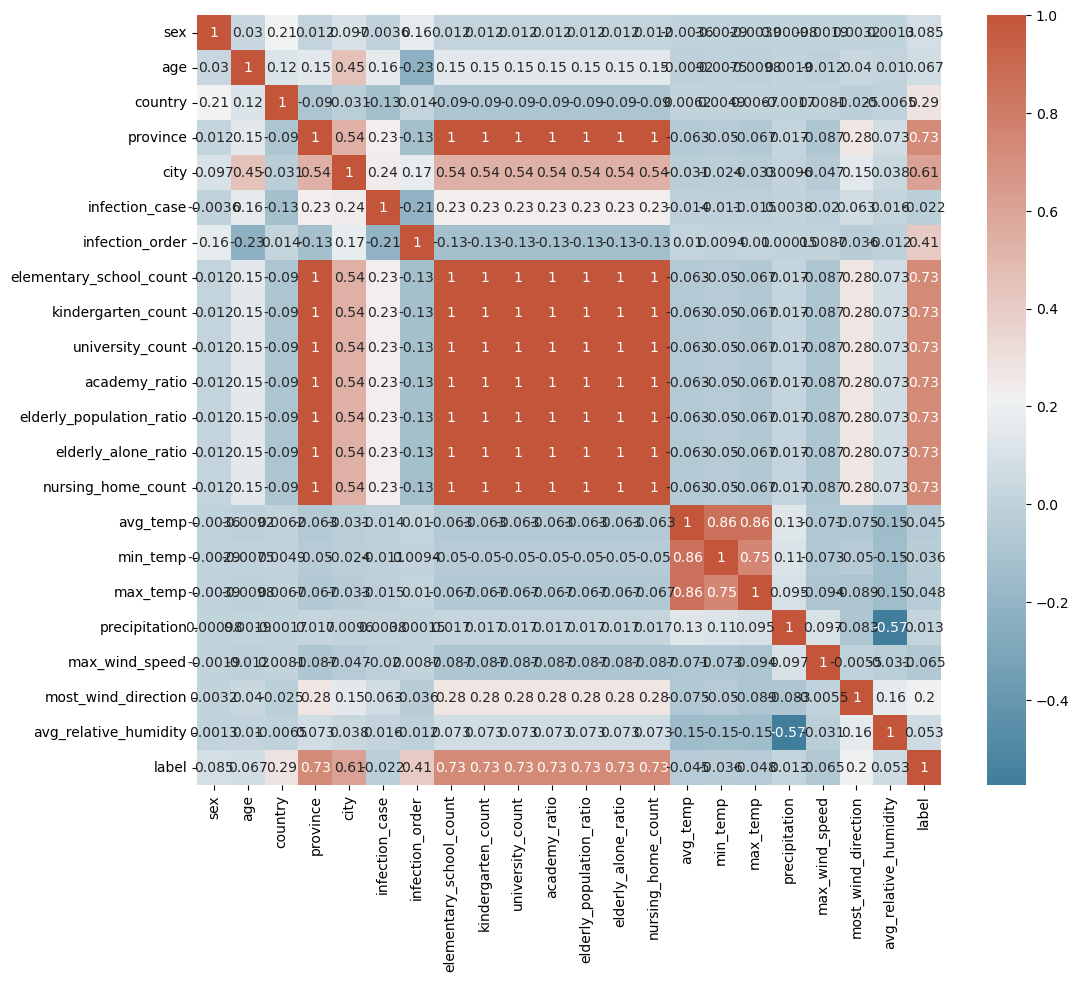

In [ ]:
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=cmap)
plt.show()

In [ ]:
X = df.drop(columns=[df.columns[-1]]).values
y = df[df.columns[-1]].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### OVA

In [ ]:
base_estimator = lambda: DecisionTreeClassifier(max_depth=3,method="cart")
ova_classifier = OneVsAllClassifier(base_estimator)
ova_classifier.fit(X_train, y_train, dtype_dict)

In [ ]:
y_pred = ova_classifier.predict(X_test)
_accuracy = accuracy(y_pred, y_test)
_precision = precision(y_pred, y_test)
_recall = recall(y_pred, y_test)

print(f"accuracy : {_accuracy}")
print(f"precision : {_precision}")
print(f"recall : {_recall}")

_confusion_matrix = confusion_matrix(y_pred, y_test)
print(_confusion_matrix)

accuracy : 1.0
precision : 1.0
recall : 1.0
[[6764    0]
 [   0 2604]]


#### OVA sklearn

In [ ]:
base_estimator = tree.DecisionTreeClassifier(max_depth=3)
ova_classifier = OVASklearn(base_estimator)
ova_classifier.fit(X_train, y_train)

OneVsRestClassifier(estimator=DecisionTreeClassifier(max_depth=3))

In [ ]:
y_pred = ova_classifier.predict(X_test)
_accuracy = accuracy(y_pred, y_test)
_precision = precision(y_pred, y_test)
_recall = recall(y_pred, y_test)

print(f"accuracy : {_accuracy}")
print(f"precision : {_precision}")
print(f"recall : {_recall}")

_confusion_matrix = confusion_matrix(y_pred, y_test)
print(_confusion_matrix)

accuracy : 1.0
precision : 1.0
recall : 1.0
[[6764    0]
 [   0 2604]]


#### OVO

In [ ]:
base_estimator = lambda: DecisionTreeClassifier(max_depth=3,method="cart")
ovo_classifier = OneVsOneClassifier(base_estimator)
ovo_classifier.fit(X_train, y_train, dtype_dict)

In [ ]:
y_pred = ovo_classifier.predict(X_test)
_accuracy = accuracy(y_pred, y_test)
_precision = precision(y_pred, y_test)
_recall = recall(y_pred, y_test)

print(f"accuracy : {_accuracy}")
print(f"precision : {_precision}")
print(f"recall : {_recall}")

_confusion_matrix = confusion_matrix(y_pred, y_test)
print(_confusion_matrix)

accuracy : 1.0
precision : 1.0
recall : 1.0
[[6764    0]
 [   0 2604]]


#### OVO Sklearn

In [ ]:
base_estimator = tree.DecisionTreeClassifier(max_depth=3)
ovo_classifier = OVOSklearn(base_estimator)
ovo_classifier.fit(X_train, y_train)

OneVsOneClassifier(estimator=DecisionTreeClassifier(max_depth=3))

In [ ]:
y_pred = ovo_classifier.predict(X_test)
_accuracy = accuracy(y_pred, y_test)
_precision = precision(y_pred, y_test)
_recall = recall(y_pred, y_test)

print(f"accuracy : {_accuracy}")
print(f"precision : {_precision}")
print(f"recall : {_recall}")

_confusion_matrix = confusion_matrix(y_pred, y_test)
print(_confusion_matrix)

accuracy : 1.0
precision : 1.0
recall : 1.0
[[6764    0]
 [   0 2604]]
